# Machine Learning 
## Assignment 1

**Group 1:**

- Anna Laczko 12347556
- Bosse Behrens 12347333
- Marcell Szekrenyes 12347300


In [1]:
%pip install basemap basemap-data-hires

     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     -------------------------------------- 56.0/56.0 kB 973.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------------------------------- 167.0/167.0 kB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/507.6 kB ? eta -:--:--
   --------------------------------------- 507.6/507.6 kB 15.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/91.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/91.1 MB 33.3 MB/s eta 0:00:03
    --------------------------------------- 1.4/91.1 MB 21.5 MB/s eta 0:00:05
    --------------------------------------- 1.6/91.1 MB 12.7 MB/s eta 0:00:08
   - -------------------------------------- 3.0/91.1 MB 17.6 MB/s eta 0:00:05
   - -------------------------------------- 3.1/91.1 MB 16.7 MB/s eta 0:00:06
   - ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## How to aquire the Datasets

Right now, we couldn't manage to download automatically the datafiles to our project folder. 
- The datafiles can be found in our  [GitHub Repository](https://github.com/annalaczko/ML-Group-1-Assignment-1):
- Or can be downloaded from [HERE](https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction/data) and [HERE](https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset)
    - In this case, the data files should be copied to root, in the folder named "data"



## Loan Acceptance Dataset

In [3]:
df_loan=pd.read_csv("data/credit_risk_dataset.csv")

In [4]:
df_loan.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [5]:
df_loan.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

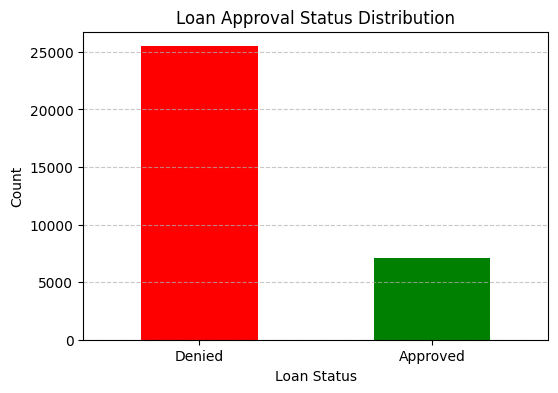

In [6]:
loan_status_counts = df_loan["loan_status"].value_counts()

plt.figure(figsize=(6, 4))
loan_status_counts.plot(kind='bar', color=['red', 'green'])

plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Denied', 'Approved'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Age is just a number

We can find some interesting data if we take a look at the age column...
- The question is, does this count as valid data? 
- Are all loans with unrealistic age denied?

Text(0, 0.5, 'Frequency (Log scale)')

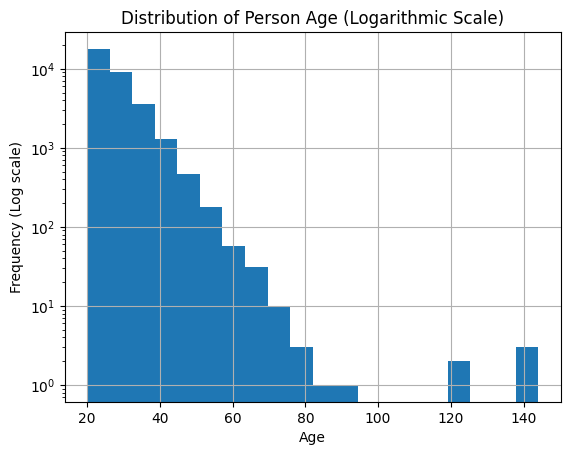

In [28]:
df_loan["person_age"].hist(bins=20, log=True)
plt.title("Distribution of Person Age (Logarithmic Scale)")
plt.xlabel("Age")
plt.ylabel("Frequency (Log scale)")

In [8]:
df_immortal=df_loan[df_loan["person_age"]>115]
df_immortal["loan_status"].value_counts()

loan_status
0    5
Name: count, dtype: int64

This means that all was denied so maybe it's still usable data

### Analyzing Income

Text(0, 0.5, 'Frequency (Log scale)')

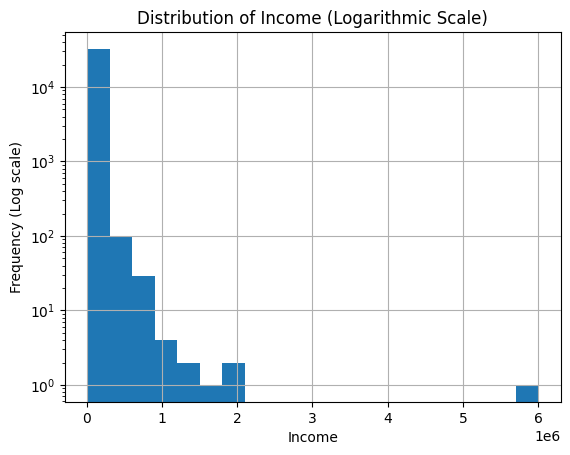

In [29]:
df_loan["person_income"].hist(bins=20, log=True)
plt.title("Distribution of Income (Logarithmic Scale)")
plt.xlabel("Income")
plt.ylabel("Frequency (Log scale)")

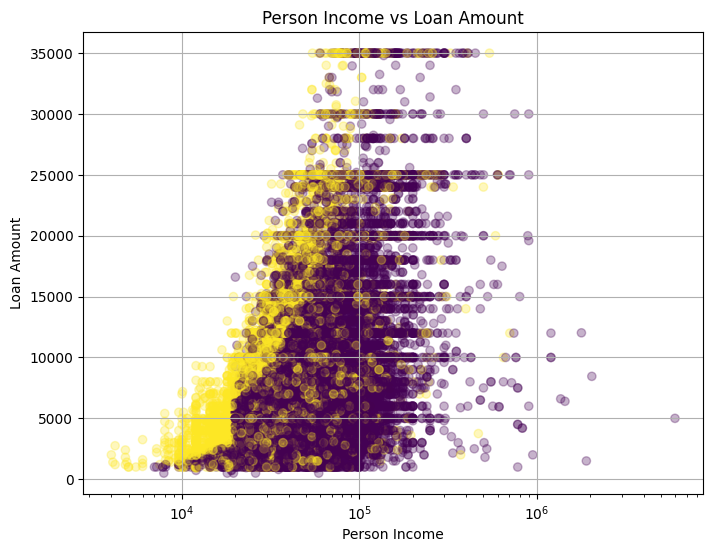

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df_loan["person_income"], df_loan["loan_amnt"], alpha=0.3, c=df_loan["loan_status"])
plt.title("Person Income vs Loan Amount")
plt.xlabel("Person Income")
plt.ylabel("Loan Amount")
plt.xscale('log')

plt.grid(True)
plt.show()


### Loan Information
We have several categorical columns about the loan, let's take a look at their distribution

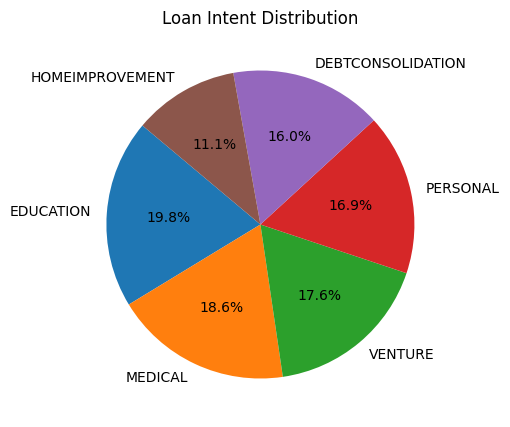

In [11]:
intent_counts = df_loan['loan_intent'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(intent_counts, labels=intent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Intent Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

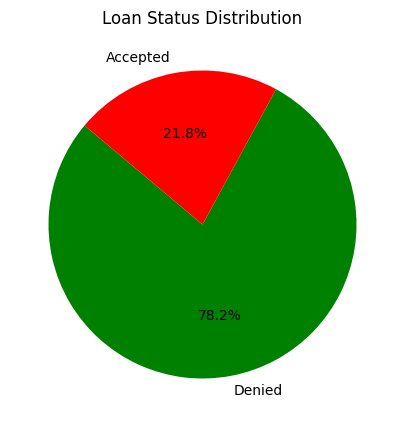

In [12]:
status_counts = df_loan['loan_status'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(status_counts, labels=["Denied","Accepted"], autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Loan Status Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

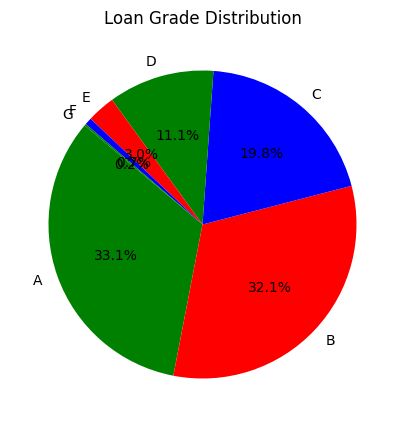

In [13]:
grade_counts = df_loan['loan_grade'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Loan Grade Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Housing Dataset
Housing data from Seattle

In [14]:
df_housing=pd.read_csv("data/Housing.csv")

In [15]:
df_housing.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df_housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Analyzing price

<Axes: >

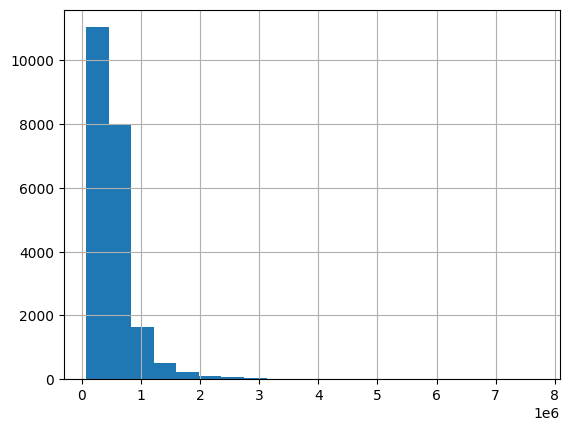

In [17]:
df_housing["price"].hist(bins=20, log=False)

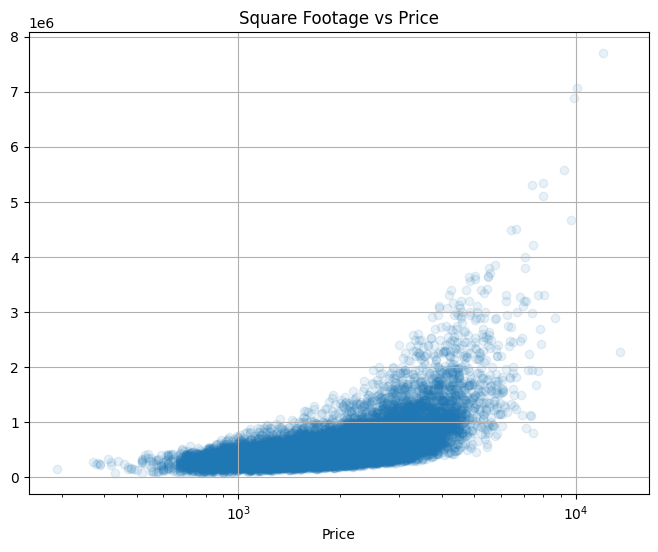

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(df_housing["sqft_living"], df_housing["price"], alpha=0.1)
plt.title("Square Footage vs Price")
plt.xlabel("Price")
plt.xscale('log')
plt.grid(True)
plt.show()

### Bedrooms
Looking at the bedroom distribution.

<Axes: >

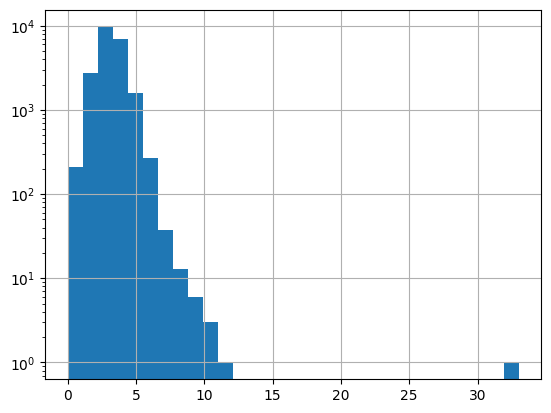

In [19]:
df_housing["bedrooms"].hist(bins=30, log=True)

### Categorical values

View is a value which describes the lot's view by giving it a grade.

In [20]:
df_housing["view"].unique()

array([0, 3, 4, 2, 1], dtype=int64)

<Axes: >

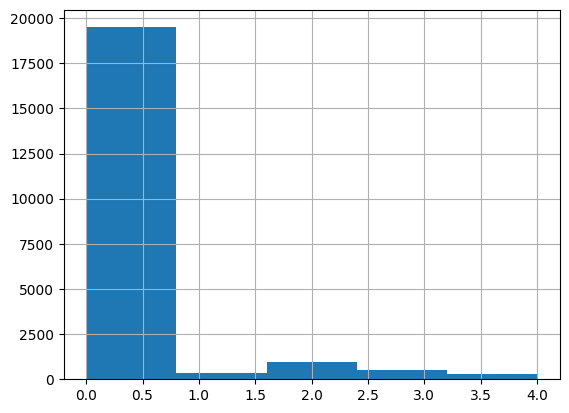

In [21]:
df_housing["view"].hist(bins=5, log=False)

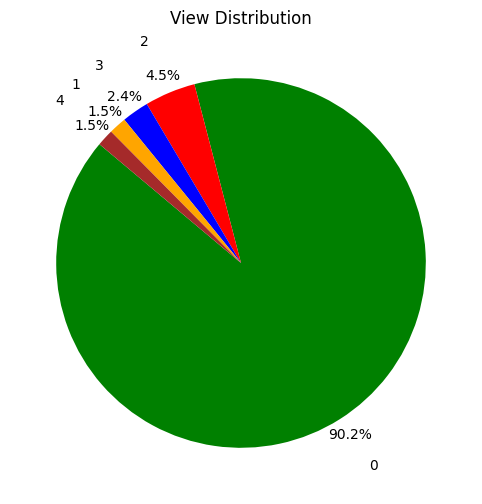

In [22]:
view_counts = df_housing['view'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(view_counts, labels=view_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=1.1, labeldistance=1.3, colors=['green', 'red', 'blue', 'orange', 'brown'])
plt.title('View Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

As we can see most of it considered 0, which is probably the lowest value. We can check it by comparing the average price of the lots grouped by view grade.

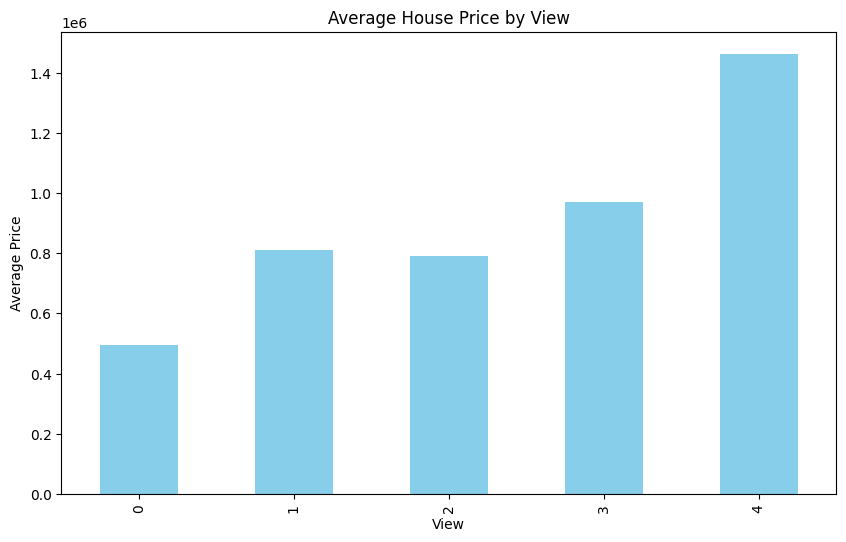

In [23]:
avg_price_by_view = df_housing.groupby('view')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_by_view.plot(kind='bar', color='skyblue')

plt.title('Average House Price by View')
plt.xlabel('View')
plt.ylabel('Average Price')

plt.show()

We can also make a similar comparison for the condition value

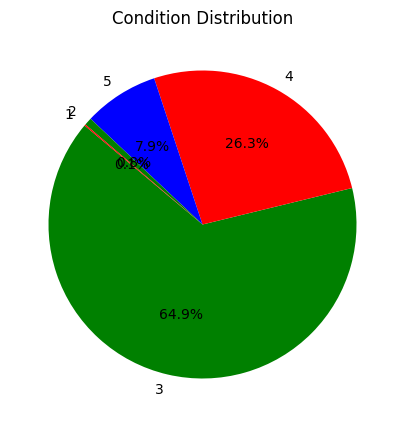

In [24]:
condition_counts = df_housing['condition'].value_counts()

plt.figure(figsize=(8, 5))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Condition Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

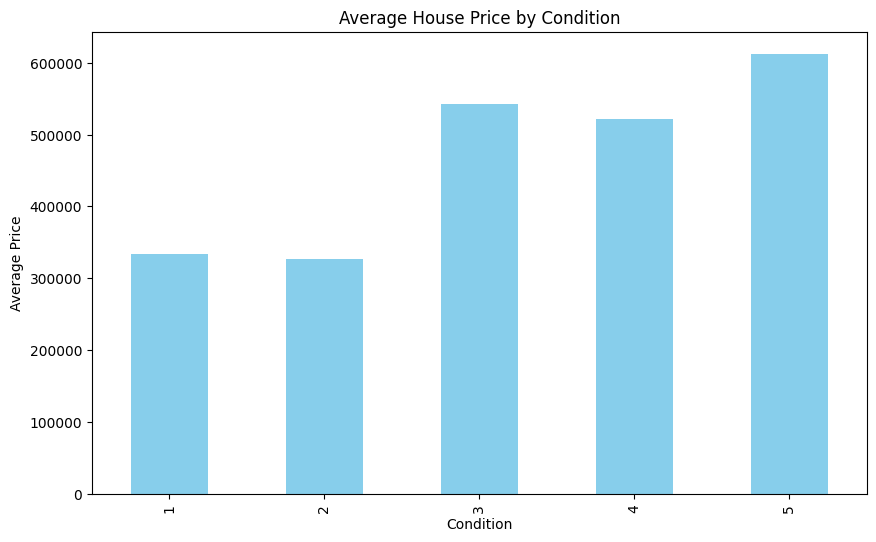

In [25]:
avg_price_by_condition = df_housing.groupby('condition')['price'].mean()

plt.figure(figsize=(10, 6))
avg_price_by_condition.plot(kind='bar', color='skyblue')

plt.title('Average House Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')

plt.show()

### Location information

From the location information we can determine the location which is Seattle

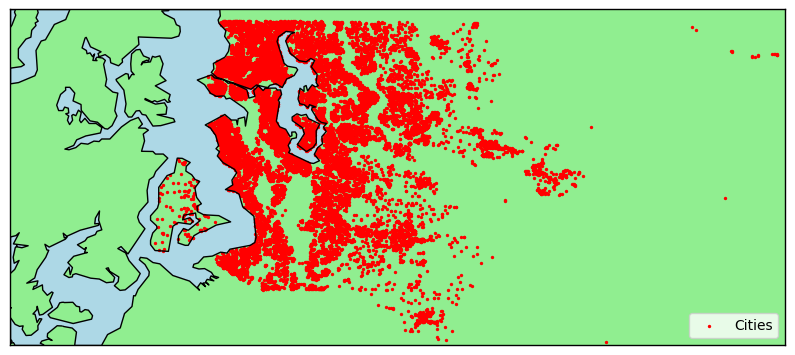

In [26]:
plt.figure(figsize=(10, 10))

#Seattle area
m = Basemap(projection='cyl', resolution='h',
            llcrnrlon=-122.8, llcrnrlat=47.15, 
            urcrnrlon=-121.3, urcrnrlat=47.8)

m.drawcoastlines()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgreen', lake_color='lightblue')

x, y = m(df_housing["long"], df_housing["lat"])

m.scatter(x,y, color='red', marker='o', s=2, label='Cities')
plt.legend()
plt.show()


### House building year

<Axes: >

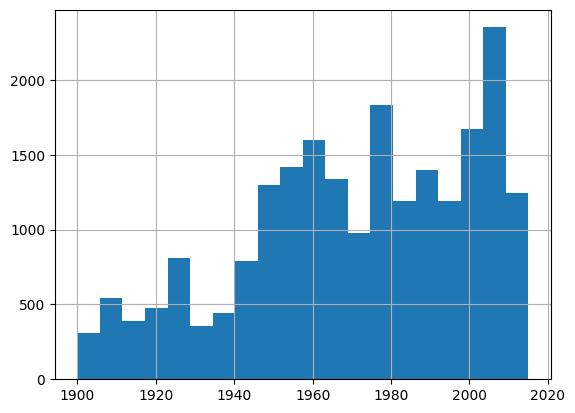

In [27]:
df_housing["yr_built"].hist(bins=20)